In [1]:
#interactive plots in jupyter notebook
%matplotlib notebook

#dependencies
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#dependencies
import numpy as np
import pandas as pd

In [3]:
#dependencies
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, join
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

import pymysql
pymysql.install_as_MySQLdb()

In [5]:
#what does the create_engine() do 
engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo=False)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#the column names in 'measurement' table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')

#the name of columns and each descriptions
count = 0 
for column in columns:
    print(column)
    count +=1
print('-'*12)
print(f'The table "measurement" has {count} columns.')

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
------------
The table "measurement" has 5 columns.


In [11]:
#column names and datatype for 'measurement' table
print('Table Descriptions')
print('-'*12)
for column in columns: 
    print(column['name'], column['type'])
    

Table Descriptions
------------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#calculate the first date of measurement 
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_string = most_recent[0]
print(f'The date of the last measurement taken is {most_recent_string}')

The date of the last measurement taken is 2017-08-23


In [13]:
most_recent_dt_obj = dt.datetime.strptime(most_recent_string, '%Y-%m-%d')

first_day = most_recent_dt_obj - dt.timedelta(days=365)
first_day_string = dt.datetime.strftime(first_day, '%Y-%m-%d')
print(f'The date 12 months from the last measurement taken is {first_day_string}')

The date 12 months from the last measurement taken is 2016-08-23


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
dates = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_day_string)

In [15]:
#declare empty list variables for dates and precipitations
result_date = []
result_prcp = []

#prints out the dates and preciptation data for the last 12 months in the collected data
for x in dates:
    result_date.append(x.date)
    result_prcp.append(x.prcp)

In [16]:
#create dataframe of collected precipitation levels and set index to its corresponding dates
df_2 = pd.DataFrame(result_prcp, index=result_date, columns=['Precipitation'])
df_2 = df_2.sort_index()
df_2.index.name = 'Date'

#display dataframe preview
df_2.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


<IPython.core.display.Javascript object>


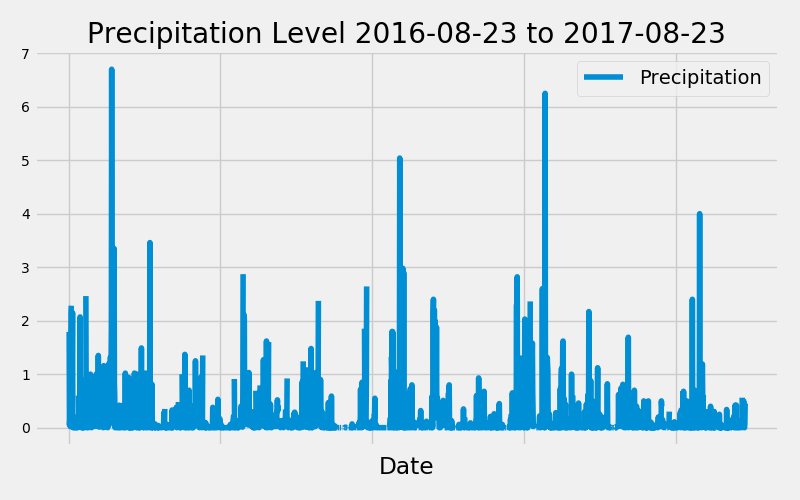

In [17]:
#use pandas to plot precipitation levels in time series plot
df_2.plot(title=f'Precipitation Level {first_day_string} to {most_recent_string}', figsize=(8,5), fontsize = 10)
plt.tight_layout()
plt.show()

In [18]:
# Calculate the date 1 year ago from today
today_date = dt.date.today()

date_year_ago = today_date - dt.timedelta(days=365)
date_year_ago

datetime.date(2017, 8, 6)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_2.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# How many stations are available in this dataset?
session.query(Measurement).group_by(Measurement.station).count()

9

In [21]:
#listing the active stations and its measurement counts in descending order
b =session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
for x in b:
    print(x)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [22]:
#lowest temperature
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()
print(f'Lowest temperature recorded: {lowest_temp}')

#highest temperature 
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()
print(f'Highest temperature recorded: {highest_temp}')

#average temperature 
highest_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').scalar()
print(f'Average temperature recorded: {highest_temp}')

Lowest temperature recorded: 54.0
Highest temperature recorded: 85.0
Average temperature recorded: 71.66378066378067


In [23]:
#last day measurement taken for station USC00519281
last_day = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()
last_day_string = last_day[0]

#format to datetime object
last_day_dt_obj = dt.datetime.strptime(last_day_string, '%Y-%m-%d')

#use timedelta to calculate the date 12 months before the date of the last measurement
first_12_months_ago = last_day_dt_obj - dt.timedelta(days=365)
first_12_months_ago_string = dt.datetime.strftime(first_12_months_ago, '%Y-%m-%d')
print(f'The date 12 months before the last measurement is {first_12_months_ago_string}')

The date 12 months before the last measurement is 2016-08-18


In [24]:
#Choose the station with the highest number of temperature observations.
#another session query to remove any rows with Null measurement values
session.query(Measurement.station, func.count(Measurement.tobs)).filter(Measurement.tobs != None).group_by(Measurement.station).\
order_by(func.count(Measurement.tobs).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_query = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= first_12_months_ago_string).all()

#create list of the last 12 months of collected temperature observations
temp_obs =[]
for x, in last_12_months_query:
    temp_obs.append(x)


#convert list of temperature observation to series 
temp_obs = pd.Series(temp_obs)

#display preview of series
temp_obs.head()

0    80.0
1    79.0
2    81.0
3    79.0
4    78.0
dtype: float64

<IPython.core.display.Javascript object>


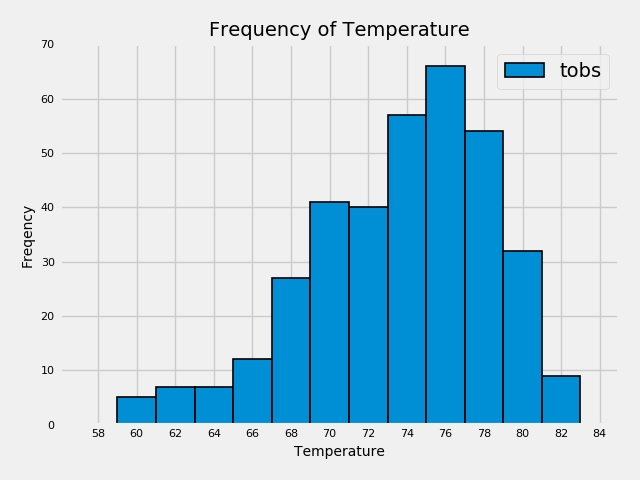

In [26]:
#number of bins
bins = 12

#plot histogram
plt.figure()
plt.hist(temp_obs, bins, label='tobs', edgecolor='black', linewidth=1.2)

plt.xlim(56,85)
plt.yticks(np.arange(0, 80, step=10), size=8)
plt.xticks(np.arange(58, 85, step=2), size=8)
plt.xlabel('Temperature', size=10)
plt.ylabel('Freqency', size=10)
plt.title('Frequency of Temperature', size=14)
plt.tight_layout()
plt.legend(loc='best')
plt.show()

# Temperature Analysis

In [27]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#trip's start and end date
start_date = '2018-08-10' 
end_date = '2018-08-23'

#returns the minimum temperature, average temperature, and maximum temperature
calc_temps(start_date, end_date)

#convert start and end date to datetime object
start_date_dt = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = dt.datetime.strptime(end_date, '%Y-%m-%d')

#using timedelta to calculate the start and end date 12 months before
start_date_year_ago = start_date_dt - dt.timedelta(days=365)
end_date_year_ago = end_date_dt - dt.timedelta(days=365)

#formate calculated datetime object in previous code to string format
start_year_ago_str = dt.datetime.strftime(start_date_year_ago, '%Y-%m-%d')
end_date_year_ago_str = dt.datetime.strftime(end_date_year_ago, '%Y-%m-%d')

In [29]:
#extract returned tuple from list
bar_temp = calc_temps(start_year_ago_str, end_date_year_ago_str)[0]

#check that the returned values are only tuple elements
bar_temp

(70.0, 78.71428571428571, 85.0)

In [30]:
#unpack tuple containing the min., avg., and max. temperature
t_min, t_avg, t_max = bar_temp

print(f'Average temperature observed between {start_year_ago_str} and {end_date_year_ago_str} is {t_avg}.')

Average temperature observed between 2017-08-10 and 2017-08-23 is 78.71428571428571.


<IPython.core.display.Javascript object>


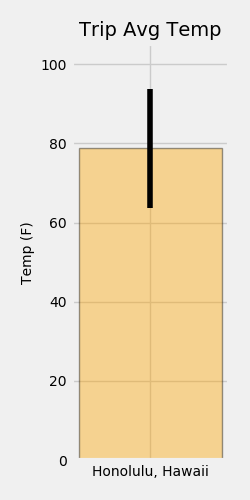

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(2.5,5))
plt.bar('Honolulu, Hawaii',t_avg, yerr=(t_max-t_min), alpha=0.4, color='orange', edgecolor='black', linewidth=1)
plt.ylim(0,105)
plt.yticks(size=10)
plt.xticks(size=10)
plt.ylabel('Temp (F)', size=10)
plt.title('Trip Avg Temp', size=14)
plt.tight_layout()
plt.show()

In [32]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_desc = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, Measurement.tobs).\
join(Station, Measurement.station == Station.station).order_by(Measurement.tobs.desc()).all()

for x in rainfall_desc:
    print(x)

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 87.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 87.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 87.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 87.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 86.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 86.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 86.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 86.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 85.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 85.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 85.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 85.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 

('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 79.0)
('USC00517948', 'PEARL CITY, HI US

('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 78.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 78.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 78.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 78.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 78.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 78.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 78.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 78.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 78.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 78.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 78.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 78.0)
('USC00

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 76.0)
('USC0

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 76.0)
('USC00516128', 'MANOA LYON 

('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 75.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 75.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 75.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 75.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 75.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 75.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 75.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 75.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 75.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 75.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 75.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 75.0)
('USC00516128', 'MA

('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 74.0)
('USC00519281', 

('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 73.0)
('USC00517948', 'PEARL CITY, HI US

('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 72.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 72.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 72.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 72.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 72.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 72.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 72.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 72.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 72.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 72.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 72.0)
('USC00514830', 'KUAL

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 72.0)
('USC00516128', 'MANOA LYON 

('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 70.0)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 70.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 

('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 69.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 69.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 69.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 69.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 69.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 69.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 69.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 69.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 69.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 69.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 69.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9

('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 66.0)
('USC00519281', 

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 63.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 63.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 63.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 63.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 63.0)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 63.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 62.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 62.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 62.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 62.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 62.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 62.0)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 62.0)
('USC00519397', '

## Optional Challenge Assignment

In [33]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)
def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
print(f'Trip Start Date: {start_date}')
print(f'Trip End Date: {end_date}')

# Use the start and end date to create a range of dates
#format trip dates to datetime objects
start_dt = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_dt = dt.datetime.strptime(end_date, '%Y-%m-%d')

#step between trip range is one day
step = dt.timedelta(days=1)

trip_date_range = []

#create list of trip's date range
while start_dt <= end_dt:
    new_start_format = start_dt.strftime('%m-%d')
    trip_date_range.append(new_start_format)
    start_dt += step

#Loop through the list of %m-%d strings and calculate the normals for each date and
#create list of tuples containing t_min, t_max, t_avg for each day of the trip's previous years date
daily_normal_list = [daily_normals(x)[0] for x in trip_date_range]

#create lists of t_min, t_max, and t_avg
t_mins = []
t_maxs = []
t_avgs = []

for t_min, t_max, t_avg in daily_normal_list:
    t_mins.append(t_min)
    t_maxs.append(t_max)
    t_avgs.append(t_avg)

Trip Start Date: 2018-08-10
Trip End Date: 2018-08-23


In [35]:
#create trip date range in datetime object for dataframe; show dates in x-axis
trip_date_range_dt = []
step = dt.timedelta(days=1)

start_dt_2 = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_dt_2 = dt.datetime.strptime(end_date, '%Y-%m-%d')

while start_dt_2 <= end_dt_2:
    trip_date_range_dt.append(start_dt_2)
    start_dt_2 += step

    
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_dict = {'Date':trip_date_range_dt, 'Min Temp':t_mins, 'Avg Temp':t_avgs, 'Max Temp':t_maxs}

#create dataframe for trip and the days daily normals
trip_df = pd.DataFrame(trip_dict)

#set date as dataframes index
trip_df = trip_df.set_index('Date')

#display dataframe
trip_df


,Avg Temp,Max Temp,Min Temp
Date,,,
2018-08-10,83.0,76.420000,65.0
2018-08-11,82.0,75.981132,67.0
2018-08-12,83.0,76.527273,67.0
2018-08-13,84.0,76.982456,71.0
2018-08-14,82.0,76.777778,71.0
2018-08-15,83.0,76.471698,69.0
2018-08-16,83.0,76.080000,69.0
2018-08-17,83.0,76.125000,69.0
2018-08-18,84.0,76.923077,70.0


<IPython.core.display.Javascript object>


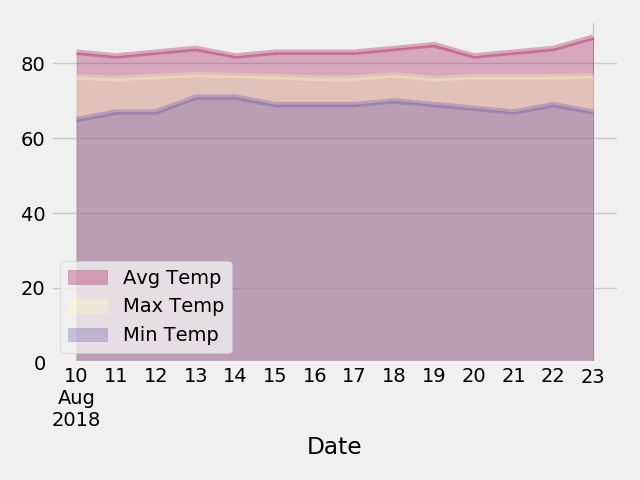

In [36]:


# Plot the daily normals as an area plot with `stacked=False`
trip_df.plot(kind='area', stacked=False, alpha=0.3, colormap='Spectral')
plt.tight_layout()
plt.show()